In [3]:
install.packages("cluster")
install.packages("factoextra")
install.packages("cluster")
install.packages("rio")
install.packages("pacman")
install.packages("tidyverse")
install.packages("magrittr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘writexl’, ‘R.utils’


Installing package into ‘/usr/local/lib/R/site-

In [8]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [10]:
df<-readRDS("/content/df_penguin.rds")%>%sample_n(100)

In [11]:
head(df,5)

y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
<fct>,<dbl>,<dbl>,<int>,<int>
Adelie,35.9,19.2,189,3800
Gentoo,43.4,14.4,218,4600
Adelie,39.6,17.2,196,3550
Adelie,40.2,17.0,176,3450
Gentoo,48.5,15.0,219,4850


In [12]:
# seperate class labels
species<-df%>%pull(y)

In [13]:
df%<>%select(-y)%>%scale()

In [14]:
head(df,5)

bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
-1.38509544,0.96792306,-0.8170031,-0.4720847
-0.05480785,-1.40129198,1.2540712,0.6061958
-0.72882023,-0.01924987,-0.3170886,-0.8090474
-0.62239722,-0.11796717,-1.7454157,-0.9438324
0.84978771,-1.10514010,1.3254875,0.9431585


In [17]:
library(factoextra)


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



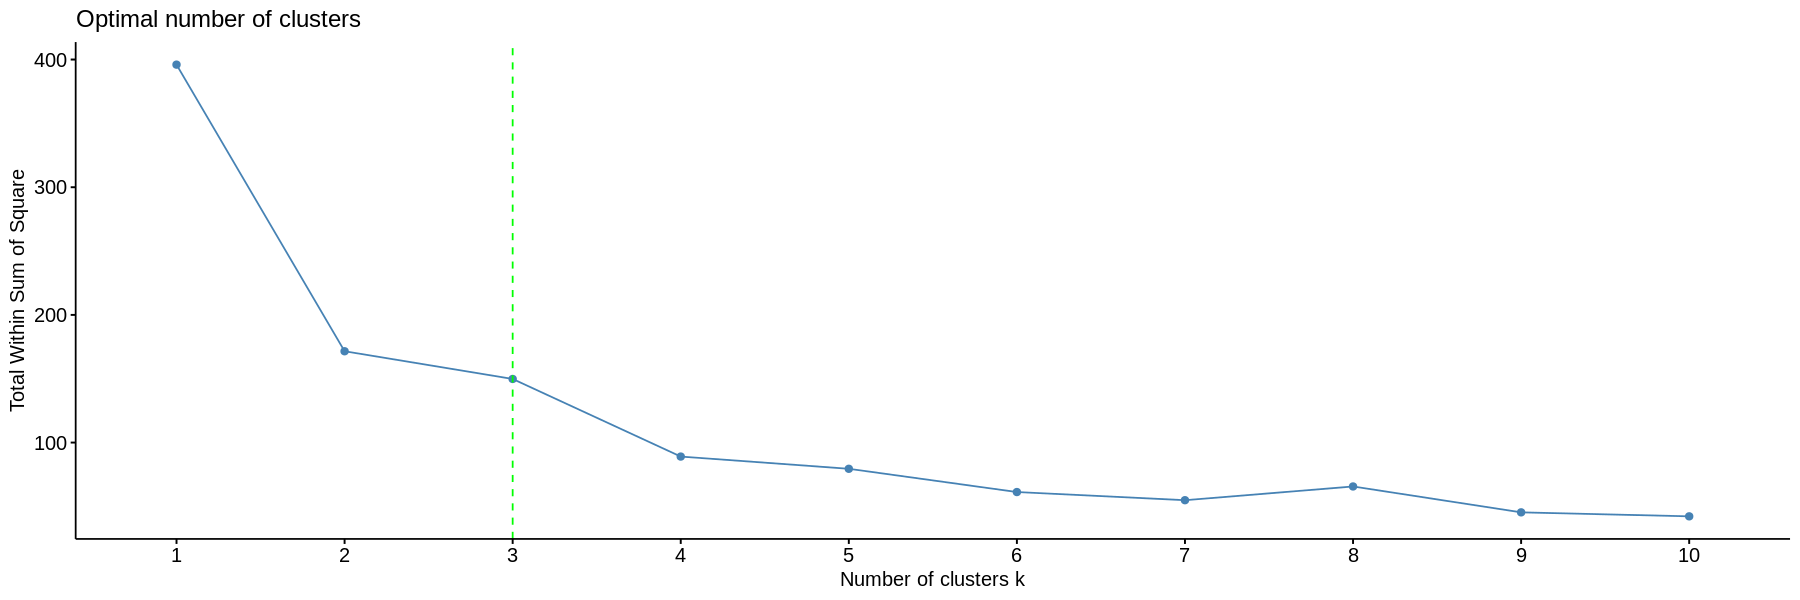

In [19]:
# Elbow method
options(repr.plot.width=15, repr.plot.height=5)
df%>%fviz_nbclust(FUN=kmeans,method="wss")+geom_vline(xintercept=3,color="green",linetype="dashed")

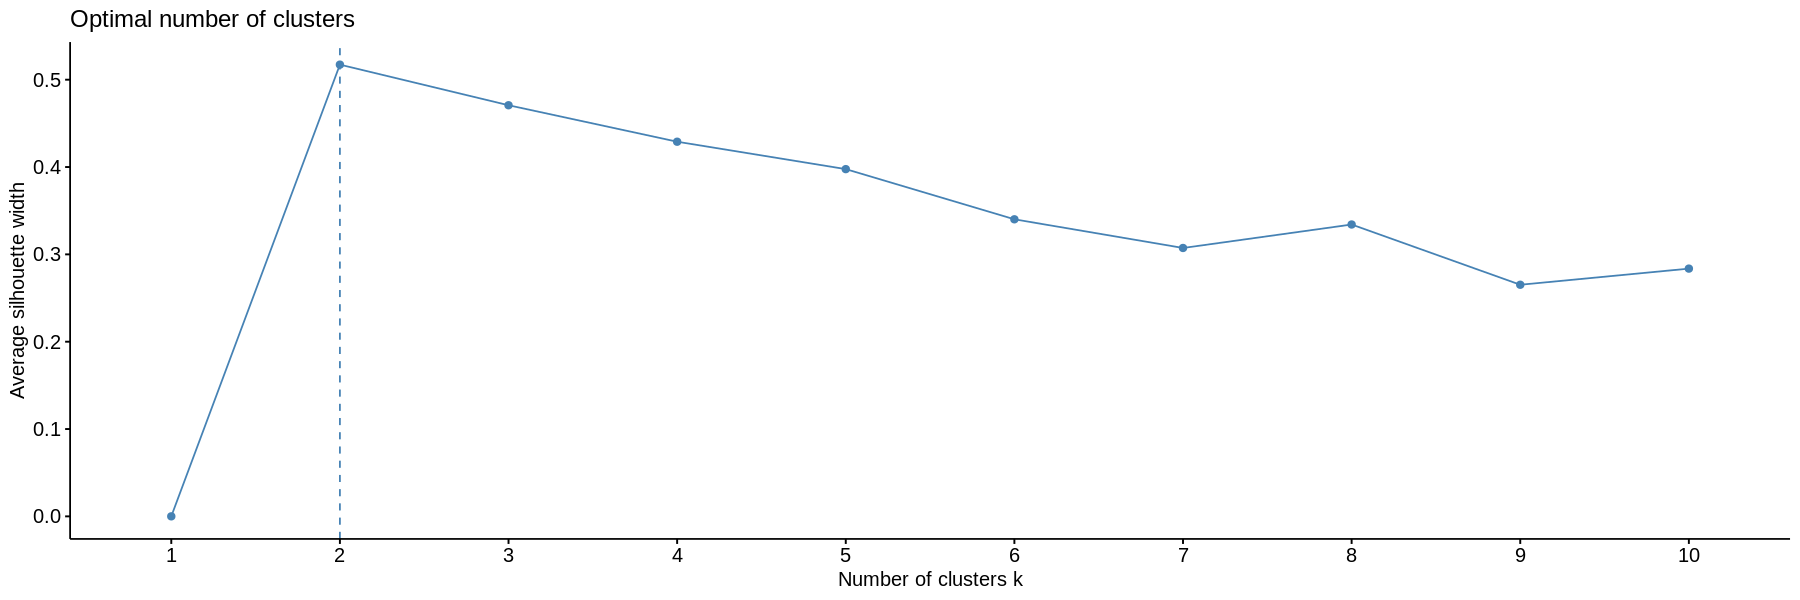

In [20]:
# Silhouette method
df%>%fviz_nbclust(FUN=kmeans,method = "silhouette")

In [22]:
library(cluster)


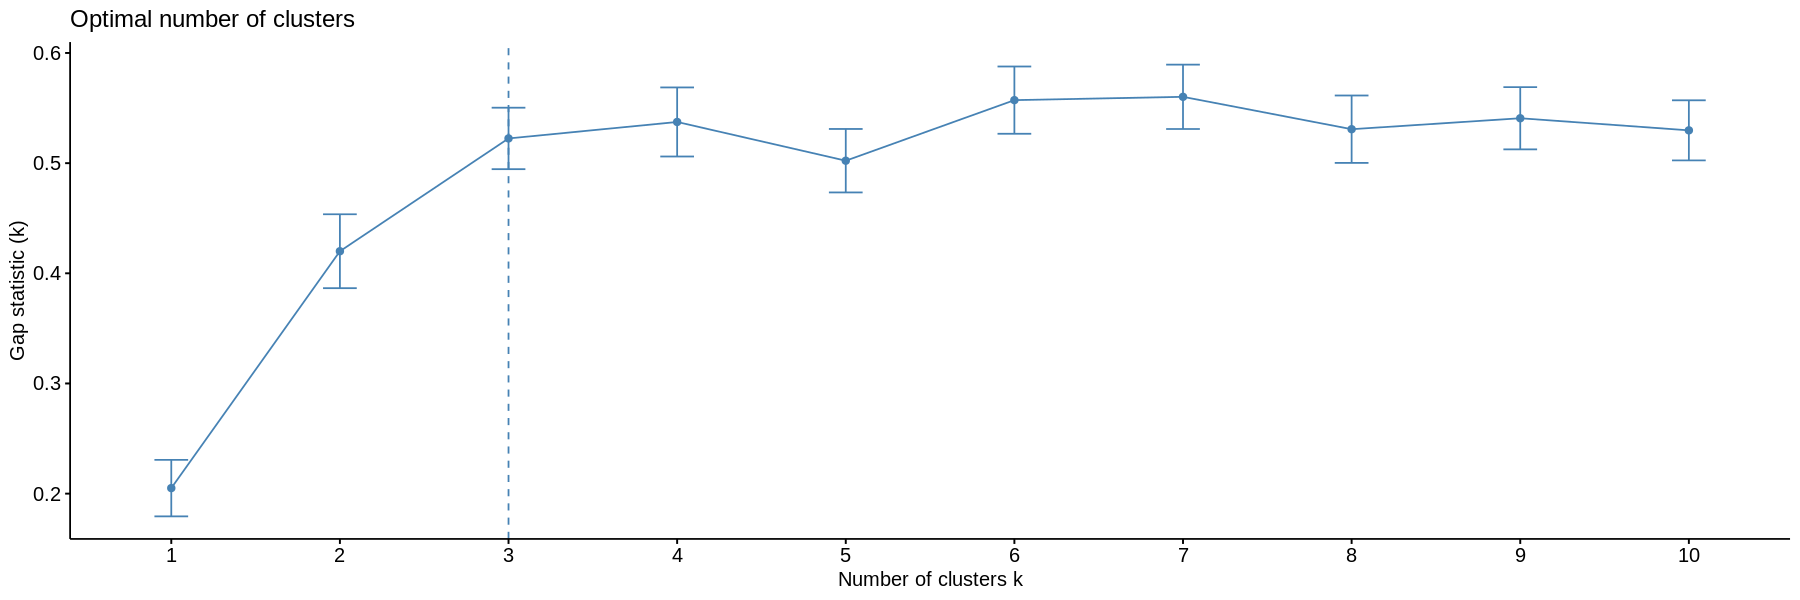

In [26]:
# Use gap statistics to find optimal number of clusters
# and visualize it using fviz_gap_stat

df%>%clusGap(.,FUNcluster=kmeans,K.max = 10,B=100)%>%fviz_gap_stat()

In [27]:
# Compute three clusters
km<-df%>%kmeans(3)%>%print()

K-means clustering with 3 clusters of sizes 19, 48, 33

Cluster means:
  bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1      1.1550537     0.6587821        -0.2043259  -0.4188801
2     -0.8888243     0.5545444        -0.7619530  -0.6040617
3      0.6278044    -1.1859088         1.2259374   1.1198086

Clustering vector:
  [1] 2 3 2 2 3 2 3 3 2 3 2 2 3 3 2 2 2 2 3 2 2 2 1 2 3 3 2 2 3 3 1 1 1 1 3 2 1
 [38] 2 2 3 2 3 3 3 3 3 2 2 3 1 1 2 1 3 2 3 2 3 1 3 3 1 1 1 2 3 1 1 2 3 1 2 2 2
 [75] 1 2 2 3 1 1 3 2 2 2 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2

Within cluster sum of squares by cluster:
[1] 16.84452 57.59042 35.38520
 (between_SS / total_SS =  72.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


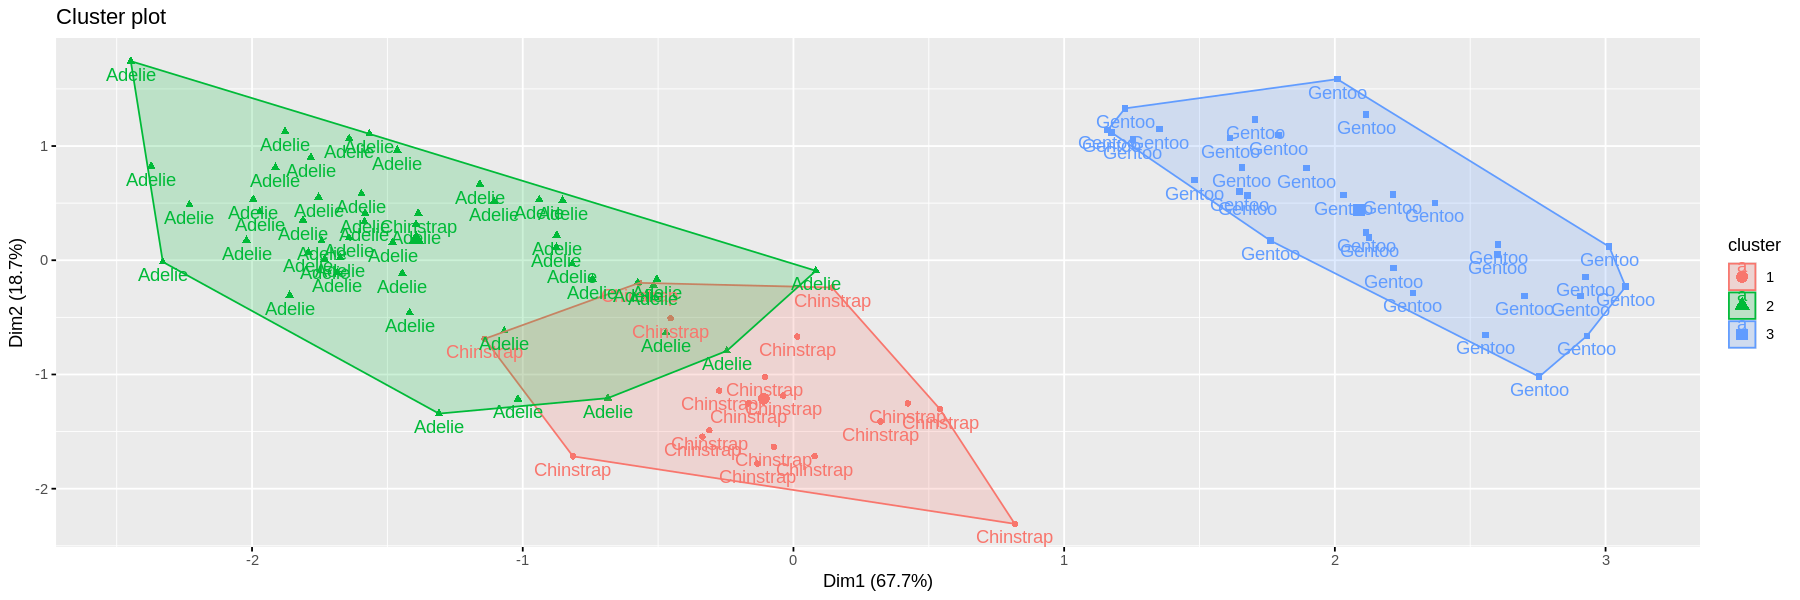

In [29]:
# Visualize the clusters
km%>%fviz_cluster(data=df,geom=c("point"))+geom_text(vjust=1.5,aes(color=as.factor(km$cluster),label=species))